In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [3]:
image_dimensions = {'height':256, 'width':256, 'channels':3}
#Created a dictionary called image dimension to store the properties of images where height:256 ,width:256 and 
#since we are using colour we set channels =3

In [4]:
#Created a classifier to prescribe the essential methods for the network ,its has method for prediction
#Fit, Accuracy  
class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [5]:

#Four convolutional block and one fully connected hidden layer
#Meso4 class takes one argument "Classifier"
#The learning rate, denoted by the symbol α, is a hyper-parameter used to govern the pace at
#which an algorithm updates or learns the values of a parameter estimate.
#determines the size of the steps taken during the optimization process, 
#The Adam optimizer, short for “Adaptive Moment Estimation,” is an iterative optimization algorithm
#used to minimize the loss function during the training of neural networks.
#The Mean Squared Error measures how close a regression line is to a set of data points
class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [6]:
# Instantiate a MesoNet model with pretrained weights
meso = Meso4()
meso.load('Meso4_DF')

C:\Users\Harini\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [7]:


dataGenerator = ImageDataGenerator(rescale=1./255)


generator = dataGenerator.flow_from_directory(
   './data/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')



Found 42540 images belonging to 2 classes.


In [8]:
generator.class_indices

{'DeepFake': 0, 'Real': 1}

Predicted likelihood: 0.5742
Actual label: 0

Correct prediction: False


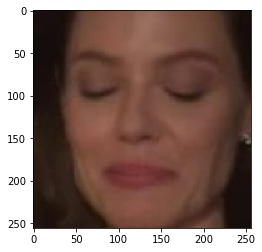

In [9]:

X, y = generator.next()


print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

plt.imshow(np.squeeze(X));

In [10]:
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [11]:
for i in range(len(generator.labels)):
    
   
    X, y = generator.next()
    pred = meso.predict(X)[0][0]
    
    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)   
        
    
    if i % 1000 == 0:
        print(i, ' predictions completed.')
    
    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

0  predictions completed.
1000  predictions completed.
2000  predictions completed.
3000  predictions completed.
4000  predictions completed.
5000  predictions completed.
6000  predictions completed.
7000  predictions completed.
8000  predictions completed.
9000  predictions completed.
10000  predictions completed.
11000  predictions completed.
12000  predictions completed.
13000  predictions completed.
14000  predictions completed.
15000  predictions completed.
16000  predictions completed.
17000  predictions completed.
18000  predictions completed.
19000  predictions completed.
20000  predictions completed.
21000  predictions completed.
22000  predictions completed.
23000  predictions completed.
24000  predictions completed.
25000  predictions completed.
26000  predictions completed.
27000  predictions completed.
28000  predictions completed.
29000  predictions completed.
30000  predictions completed.
31000  predictions completed.
32000  predictions completed.
33000  predictions comp

In [15]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

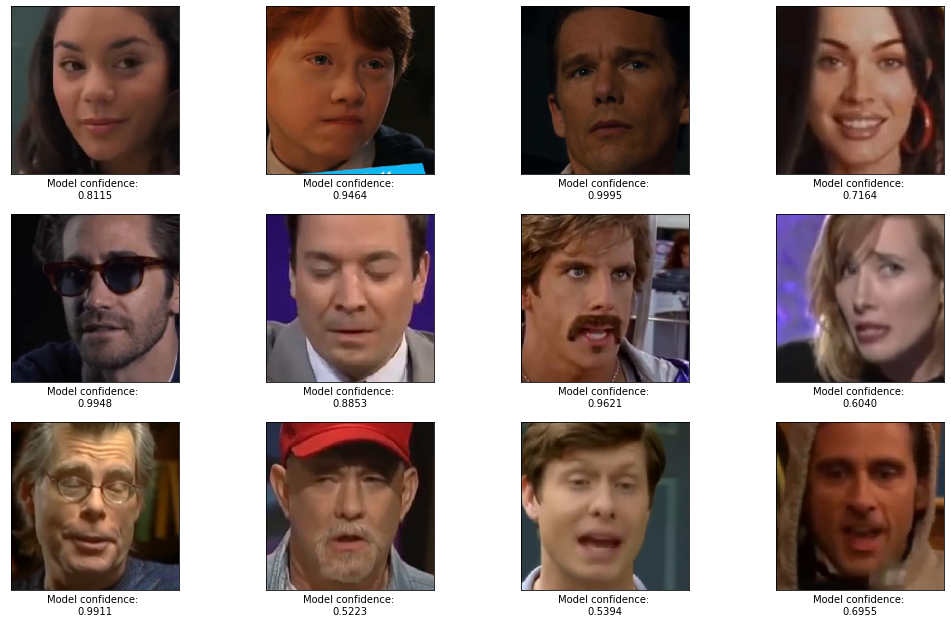

In [16]:
plotter(correct_real, correct_real_pred)

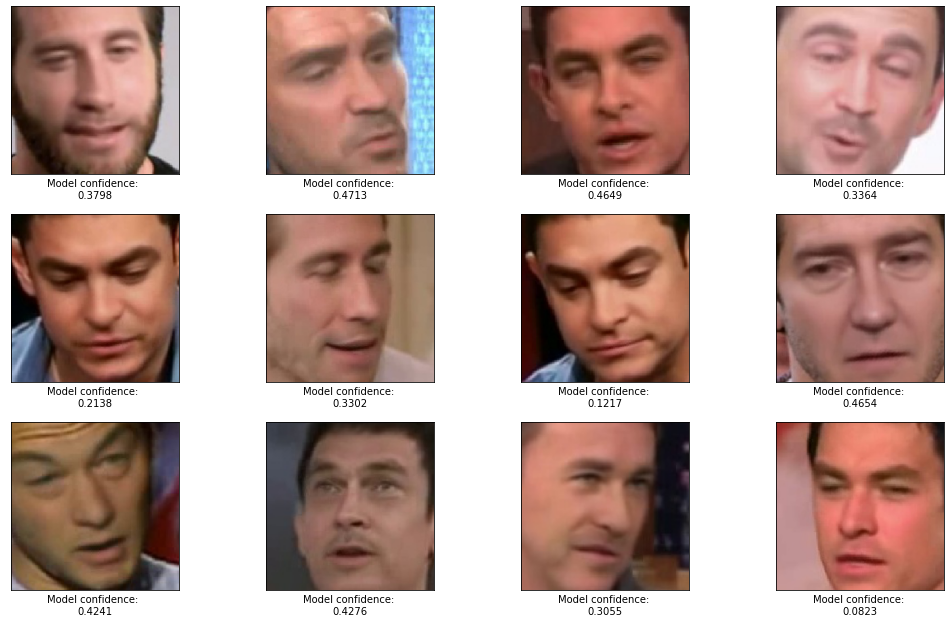

In [17]:
plotter(correct_deepfake, correct_deepfake_pred)

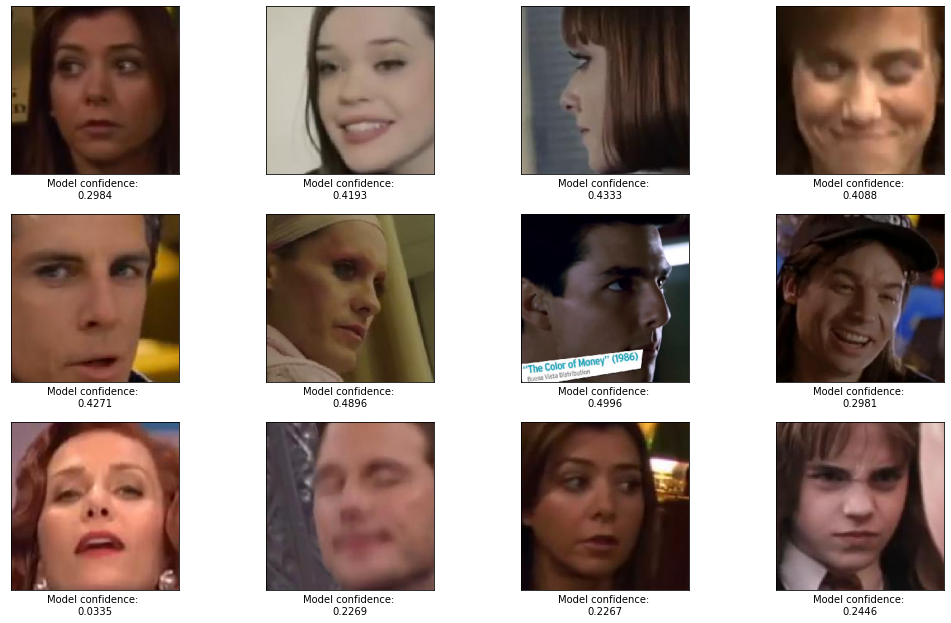

In [18]:
#plotter(misclassified_real ,misclassified_real_pred)

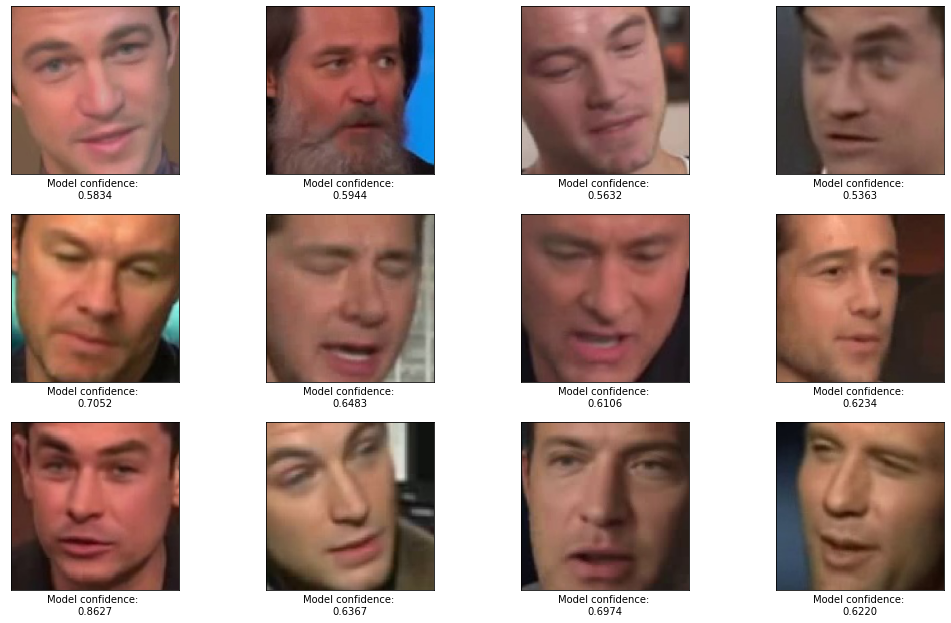

In [19]:
#plotter(misclassified_deepfake ,misclassified_deepfake_pred)

In [1]:
# Convert lists to numpy arrays
correct_real = np.array(correct_real)
correct_deepfake = np.array(correct_deepfake)
misclassified_real = np.array(misclassified_real)
misclassified_deepfake = np.array(misclassified_deepfake)

# Calculate accuracy
accuracy_real = len(correct_real) / (len(correct_real) + len(misclassified_real))
accuracy_deepfake = len(correct_deepfake) / (len(correct_deepfake) + len(misclassified_deepfake))

print(f"Accuracy for real images: {accuracy_real:.2%}")
print(f"Accuracy for deepfake images: {accuracy_deepfake:.2%}")


NameError: name 'np' is not defined